In [1]:
import numpy as np
import pandas as pd
import datetime as dt
import matplotlib as mp
import matplotlib.pyplot as plt
mp.style.use("ggplot")
%matplotlib inline

In [2]:
df = pd.read_csv("EDA_Cab_Rides.csv",index_col = "Sl no.")

In [3]:
df.dtypes

START_DATE*     object
END_DATE*       object
CATEGORY*       object
START*          object
STOP*           object
MILES*         float64
PURPOSE*        object
dtype: object

In [4]:
df.rename(columns = {"START_DATE*":"START_DATE","END_DATE*":"END_DATE","CATEGORY*":"CATEGORY","START*":"START","STOP*":"STOP",
                    "MILES*":"MILES","PURPOSE*":"PURPOSE"},inplace=True)

In [5]:
df.head(10)

,START_DATE,END_DATE,CATEGORY,START,STOP,MILES,PURPOSE
Sl no.,,,,,,,
1,01-01-2016 21:11,01-01-2016 21:17,Business,Fort Pierce,Fort Pierce,5.1,Meal/Entertain
2,01-02-2016 01:25,01-02-2016 01:37,Business,Fort Pierce,Fort Pierce,5.0,NaN
3,01-02-2016 20:25,01-02-2016 20:38,Business,Fort Pierce,Fort Pierce,4.8,Errand/Supplies
4,01-05-2016 17:31,01-05-2016 17:45,Business,Fort Pierce,Fort Pierce,4.7,Meeting
5,01-06-2016 14:42,01-06-2016 15:49,Business,Fort Pierce,West Palm Beach,63.7,Customer Visit
6,01-06-2016 17:15,01-06-2016 17:19,Business,West Palm Beach,West Palm Beach,4.3,Meal/Entertain
7,01-06-2016 17:30,01-06-2016 17:35,Business,West Palm Beach,Palm Beach,7.1,Meeting
8,01-07-2016 13:27,01-07-2016 13:33,Business,Cary,Cary,0.8,Meeting
9,01-10-2016 08:05,01-10-2016 08:25,Business,Cary,Morrisville,8.3,Meeting


In [6]:
df.tail()

,START_DATE,END_DATE,CATEGORY,START,STOP,MILES,PURPOSE
Sl no.,,,,,,,
1151,12/31/2016 1:07,12/31/2016 1:14,Business,Kar?chi,Kar?chi,0.7,Meeting
1152,12/31/2016 13:24,12/31/2016 13:42,Business,Kar?chi,Unknown Location,3.9,Temporary Site
1153,12/31/2016 15:03,12/31/2016 15:38,Business,Unknown Location,Unknown Location,16.2,Meeting
1154,12/31/2016 21:32,12/31/2016 21:50,Business,Katunayake,Gampaha,6.4,Temporary Site
1155,12/31/2016 22:08,12/31/2016 23:51,Business,Gampaha,Ilukwatta,48.2,Temporary Site


In [7]:
df["START"]=df["START"].replace({"Kar?chi":"Karachi"})

In [8]:
df["STOP"]=df["STOP"].replace({"Kar?chi":"Karachi"})

In [9]:
df

,START_DATE,END_DATE,CATEGORY,START,STOP,MILES,PURPOSE
Sl no.,,,,,,,
1,01-01-2016 21:11,01-01-2016 21:17,Business,Fort Pierce,Fort Pierce,5.1,Meal/Entertain
2,01-02-2016 01:25,01-02-2016 01:37,Business,Fort Pierce,Fort Pierce,5.0,NaN
3,01-02-2016 20:25,01-02-2016 20:38,Business,Fort Pierce,Fort Pierce,4.8,Errand/Supplies
4,01-05-2016 17:31,01-05-2016 17:45,Business,Fort Pierce,Fort Pierce,4.7,Meeting
5,01-06-2016 14:42,01-06-2016 15:49,Business,Fort Pierce,West Palm Beach,63.7,Customer Visit
...,...,...,...,...,...,...,...
1151,12/31/2016 1:07,12/31/2016 1:14,Business,Karachi,Karachi,0.7,Meeting
1152,12/31/2016 13:24,12/31/2016 13:42,Business,Karachi,Unknown Location,3.9,Temporary Site
1153,12/31/2016 15:03,12/31/2016 15:38,Business,Unknown Location,Unknown Location,16.2,Meeting


In [10]:
df.loc[(df["START"] == "Karachi") & (df["MILES"]>=3)]

,START_DATE,END_DATE,CATEGORY,START,STOP,MILES,PURPOSE
Sl no.,,,,,,,
772,9/24/2016 14:34,9/24/2016 15:15,Business,Karachi,Unknown Location,8.2,NaN
799,10-08-2016 15:03,10-08-2016 15:03,Business,Karachi,Karachi,3.6,NaN
800,10-08-2016 18:15,10-08-2016 18:18,Business,Karachi,Unknown Location,8.0,NaN
1120,12/27/2016 7:02,12/27/2016 7:14,Business,Karachi,Karachi,4.9,Temporary Site
1121,12/27/2016 8:37,12/27/2016 8:59,Business,Karachi,Karachi,5.0,Meal/Entertain
1123,12/27/2016 14:49,12/27/2016 15:03,Business,Karachi,Unknown Location,3.1,Customer Visit
1125,12/27/2016 19:19,12/27/2016 19:50,Business,Karachi,Karachi,5.5,Customer Visit
1126,12/28/2016 8:34,12/28/2016 9:06,Business,Karachi,Unknown Location,10.3,Meal/Entertain
1129,12/28/2016 15:04,12/28/2016 15:39,Business,Karachi,Unknown Location,8.5,Meal/Entertain


In [11]:
df.isnull().sum()

START_DATE      0
END_DATE        0
CATEGORY        0
START           0
STOP            0
MILES           0
PURPOSE       502
dtype: int64

In [12]:
df["PURPOSE"].mode()

0    Meeting
dtype: object

In [13]:
df["PURPOSE"].fillna("Meeting",inplace=True)

In [14]:
df.isnull().sum()

START_DATE    0
END_DATE      0
CATEGORY      0
START         0
STOP          0
MILES         0
PURPOSE       0
dtype: int64

In [15]:
df["START_DATE"] = df["START_DATE"].astype("datetime64")

In [16]:
df["END_DATE"] = df["END_DATE"].astype("datetime64")

In [17]:
df.dtypes

START_DATE    datetime64[ns]
END_DATE      datetime64[ns]
CATEGORY              object
START                 object
STOP                  object
MILES                float64
PURPOSE               object
dtype: object

In [18]:
df["TIME_ELAPSED"] = df["END_DATE"] - df["START_DATE"]

In [19]:
df["MONTH"] = df["START_DATE"].dt.month

In [20]:
df.dtypes

START_DATE       datetime64[ns]
END_DATE         datetime64[ns]
CATEGORY                 object
START                    object
STOP                     object
MILES                   float64
PURPOSE                  object
TIME_ELAPSED    timedelta64[ns]
MONTH                     int64
dtype: object

In [21]:
df.head()

,START_DATE,END_DATE,CATEGORY,START,STOP,MILES,PURPOSE,TIME_ELAPSED,MONTH
Sl no.,,,,,,,,,
1,2016-01-01 21:11:00,2016-01-01 21:17:00,Business,Fort Pierce,Fort Pierce,5.1,Meal/Entertain,0 days 00:06:00,1
2,2016-01-02 01:25:00,2016-01-02 01:37:00,Business,Fort Pierce,Fort Pierce,5.0,Meeting,0 days 00:12:00,1
3,2016-01-02 20:25:00,2016-01-02 20:38:00,Business,Fort Pierce,Fort Pierce,4.8,Errand/Supplies,0 days 00:13:00,1
4,2016-01-05 17:31:00,2016-01-05 17:45:00,Business,Fort Pierce,Fort Pierce,4.7,Meeting,0 days 00:14:00,1
5,2016-01-06 14:42:00,2016-01-06 15:49:00,Business,Fort Pierce,West Palm Beach,63.7,Customer Visit,0 days 01:07:00,1


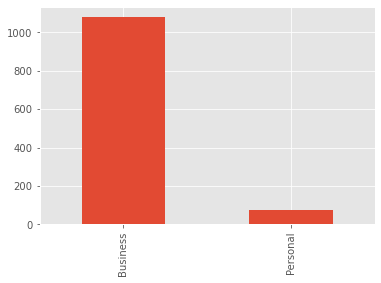

In [22]:
df["CATEGORY"].value_counts().plot(kind="bar");

In [23]:
df.head()

,START_DATE,END_DATE,CATEGORY,START,STOP,MILES,PURPOSE,TIME_ELAPSED,MONTH
Sl no.,,,,,,,,,
1,2016-01-01 21:11:00,2016-01-01 21:17:00,Business,Fort Pierce,Fort Pierce,5.1,Meal/Entertain,0 days 00:06:00,1
2,2016-01-02 01:25:00,2016-01-02 01:37:00,Business,Fort Pierce,Fort Pierce,5.0,Meeting,0 days 00:12:00,1
3,2016-01-02 20:25:00,2016-01-02 20:38:00,Business,Fort Pierce,Fort Pierce,4.8,Errand/Supplies,0 days 00:13:00,1
4,2016-01-05 17:31:00,2016-01-05 17:45:00,Business,Fort Pierce,Fort Pierce,4.7,Meeting,0 days 00:14:00,1
5,2016-01-06 14:42:00,2016-01-06 15:49:00,Business,Fort Pierce,West Palm Beach,63.7,Customer Visit,0 days 01:07:00,1


In [24]:
"""df["MONTH"].replace({1:"Jan",2:"Feb",3:"Mar",4:"Apr",5:"May",6:"Jun",7:"Jul",8:"Aug",9:"Sep",10:"Oct",11:"Nov",12:"Dec"}
                    ,inplace = False)"""

'df["MONTH"].replace({1:"Jan",2:"Feb",3:"Mar",4:"Apr",5:"May",6:"Jun",7:"Jul",8:"Aug",9:"Sep",10:"Oct",11:"Nov",12:"Dec"}\n                    ,inplace = False)'

In [25]:
trips_pm = df["MONTH"].value_counts().sort_index()

In [26]:
trips_pm

1      61
2     115
3     113
4      54
5      49
6     108
7     112
8     133
9      36
10    106
11    122
12    146
Name: MONTH, dtype: int64

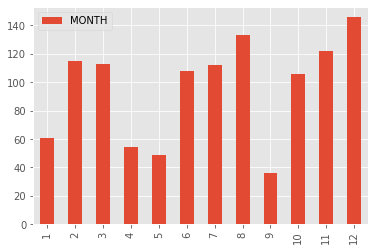

In [93]:
trips_pm.plot(kind="bar",legend=True);

In [28]:
df.loc[(df["CATEGORY"] == "Business")]

,START_DATE,END_DATE,CATEGORY,START,STOP,MILES,PURPOSE,TIME_ELAPSED,MONTH
Sl no.,,,,,,,,,
1,2016-01-01 21:11:00,2016-01-01 21:17:00,Business,Fort Pierce,Fort Pierce,5.1,Meal/Entertain,0 days 00:06:00,1
2,2016-01-02 01:25:00,2016-01-02 01:37:00,Business,Fort Pierce,Fort Pierce,5.0,Meeting,0 days 00:12:00,1
3,2016-01-02 20:25:00,2016-01-02 20:38:00,Business,Fort Pierce,Fort Pierce,4.8,Errand/Supplies,0 days 00:13:00,1
4,2016-01-05 17:31:00,2016-01-05 17:45:00,Business,Fort Pierce,Fort Pierce,4.7,Meeting,0 days 00:14:00,1
5,2016-01-06 14:42:00,2016-01-06 15:49:00,Business,Fort Pierce,West Palm Beach,63.7,Customer Visit,0 days 01:07:00,1
...,...,...,...,...,...,...,...,...,...
1151,2016-12-31 01:07:00,2016-12-31 01:14:00,Business,Karachi,Karachi,0.7,Meeting,0 days 00:07:00,12
1152,2016-12-31 13:24:00,2016-12-31 13:42:00,Business,Karachi,Unknown Location,3.9,Temporary Site,0 days 00:18:00,12
1153,2016-12-31 15:03:00,2016-12-31 15:38:00,Business,Unknown Location,Unknown Location,16.2,Meeting,0 days 00:35:00,12


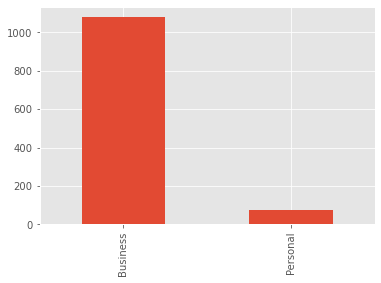

In [29]:
df["CATEGORY"].value_counts().plot(kind="bar");

In [30]:
df["TIME_ELAPSED"]/60

Sl no.
1      0 days 00:00:06
2      0 days 00:00:12
3      0 days 00:00:13
4      0 days 00:00:14
5      0 days 00:01:07
             ...      
1151   0 days 00:00:07
1152   0 days 00:00:18
1153   0 days 00:00:35
1154   0 days 00:00:18
1155   0 days 00:01:43
Name: TIME_ELAPSED, Length: 1155, dtype: timedelta64[ns]

In [31]:
mins = []
for time in df["TIME_ELAPSED"]:
    mins.append(time.seconds/60)
df["TIME_ELAPSED"] = mins

In [32]:
df["Speed(miles/hr)"] = round(df["MILES"] / (df["TIME_ELAPSED"]/60),0)

In [33]:
#df.loc[df["Speed(miles/hr)"]<50,"SPEED_TEST"]="Normal Speed"
#df.loc[df["Speed(miles/hr)"]>50,"SPEED_TEST"]="High Speed"

In [34]:
df.dtypes

START_DATE         datetime64[ns]
END_DATE           datetime64[ns]
CATEGORY                   object
START                      object
STOP                       object
MILES                     float64
PURPOSE                    object
TIME_ELAPSED              float64
MONTH                       int64
Speed(miles/hr)           float64
dtype: object

In [36]:
#df.drop("SPEED_TEST",axis=1,inplace=True)

In [37]:
#df["SPEED"] = df["Speed(miles/hr)"].apply(lambda x: "Normal Speed" if x<50 else "High speed")

In [39]:
#df.drop("SPEED",axis=1, inplace=True)

In [42]:
#df["SPEED"] = ["Normal speed" if x<50 else "High speed" for x in df["Speed(miles/hr)"]]

In [43]:
#df.drop("SPEED",axis=1, inplace=True)

In [70]:
result = []

for value in df["Speed(miles/hr)"]:
    if value<=50:
        result.append("Normal Speed")
    elif value>50:
        result.append("High Speed")
        
df["Speed"] = result

In [45]:
#df.drop("Speed",axis=1,inplace=True)

<AxesSubplot:>

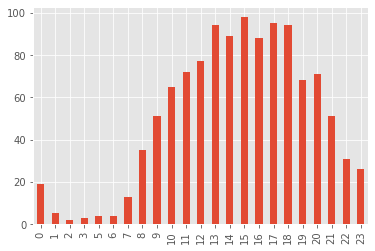

In [68]:
#Checking for preak hours
df["START_DATE"].dt.hour.value_counts().sort_index().plot(kind="bar")